In [ ]:
#r"C:\Users\tusha\Project- Image segmentation\data\train"

In [1]:
import matplotlib.image as img 
import matplotlib.pyplot as plt 
from scipy.cluster.vq import whiten 
from scipy.cluster.vq import kmeans 
import pandas as pd 

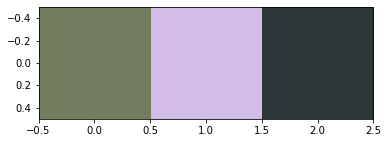

In [2]:

  
batman_image = img.imread(r"C:\Users\tusha\Desktop\test images\495.jpg")
  
r = [] 
g = [] 
b = [] 
for row in batman_image: 
    for temp_r, temp_g, temp_b in row: 
        r.append(temp_r) 
        g.append(temp_g) 
        b.append(temp_b) 
   
batman_df = pd.DataFrame({'red' : r, 
                          'green' : g, 
                          'blue' : b}) 
  
batman_df['scaled_color_red'] = whiten(batman_df['red']) 
batman_df['scaled_color_blue'] = whiten(batman_df['blue']) 
batman_df['scaled_color_green'] = whiten(batman_df['green']) 
  
cluster_centers, _ = kmeans(batman_df[['scaled_color_red', 
                                    'scaled_color_blue', 
                                    'scaled_color_green']], 3) 
  
dominant_colors = [] 
  
red_std, green_std, blue_std = batman_df[['red', 
                                          'green', 
                                          'blue']].std() 
  
for cluster_center in cluster_centers: 
    red_scaled, green_scaled, blue_scaled = cluster_center 
    dominant_colors.append(( 
        red_scaled * red_std / 255, 
        green_scaled * green_std / 255, 
        blue_scaled * blue_std / 255
    )) 
  
plt.imshow([dominant_colors]) 
plt.show()

In [ ]:
TEST FILE TO CHECK DOMINANT COLOURS IN THE IMAGES AND USING KMEANS FILTER TO GIVE AN indication of the number of clusters we can use

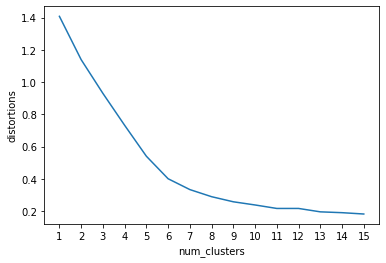

In [11]:
import seaborn as sns
# Preparing data to construct elbow plot. 
distortions = [] 
num_clusters = range(1, 16)  #range of cluster sizes 
  
# Create a list of distortions from the kmeans function 
for i in num_clusters: 
    cluster_centers, distortion = kmeans(batman_df[['scaled_color_red',  
                                                    'scaled_color_blue',  
                                                    'scaled_color_green']], i) 
    distortions.append(distortion) 
      
# Create a data frame with two lists, num_clusters and distortions 
elbow_plot = pd.DataFrame({'num_clusters' : num_clusters, 
                           'distortions' : distortions}) 
  
# Create a line plot of num_clusters and distortions 
sns.lineplot(x = 'num_clusters', y = 'distortions', data = elbow_plot) 
plt.xticks(num_clusters) 
plt.show() 

In [4]:
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import matplotlib.pyplot as plt
%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (256, 512, 3)


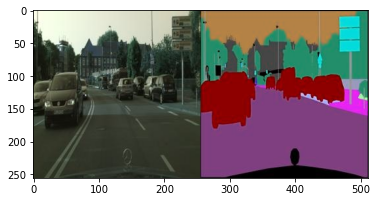

In [14]:
image = cv2.imread(r'C:\Users\tusha\Desktop\test images\495.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

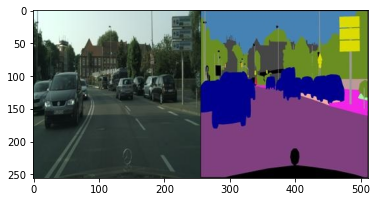

In [15]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
Testing and converting mystreet images to grey 

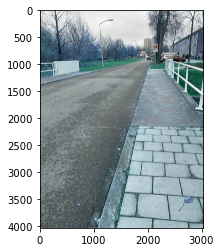

In [18]:

image = cv2.imread(r'C:\Users\tusha\Desktop\test images\mystreet\IMG-4626.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
cv2.imshow('Original image',image)
cv2.imshow('Gray image', gray)
  
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(image)

The type of this input is <class 'numpy.ndarray'>
Shape: (4032, 3024, 3)


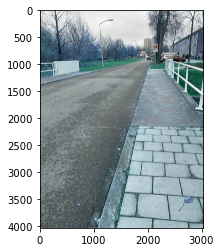

In [11]:
image = cv2.imread(r'C:\Users\tusha\Desktop\test images\mystreet\IMG-4626.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

In [12]:
from PIL import Image
colors = image.convert('RGB').getcolors() #this converts the mode to RGB

AttributeError: 'numpy.ndarray' object has no attribute 'convert'

In [ ]:
NEW TEST FOR CLUSTERS 

In [49]:
def LoadImage(name, path=r"C:\Users\tusha\test setup_project",
             rotation=0.0, flip=False, cut_bottom=58,
             size=(256, 200)):
    img = Image.open(path+"/"+name)
    img = np.array(img)
    seg = img[:-cut_bottom, 256:]
    img = img[:-cut_bottom, 0:256]
    
    for i in range(3):
        zimg = img[:,:,i]
        zimg = cv2.equalizeHist(zimg)
        img[:,:,i] = zimg
    
    img = Image.fromarray(img).resize(size)
    seg = Image.fromarray(seg).resize(size)
    
    

    img = img.rotate(rotation)
    seg = seg.rotate(rotation)

    img = np.array(img)
    seg = np.array(seg)

    if flip:
        img = img[:,::-1,:]
        seg = seg[:,::-1,:]

        #seg = np.round(seg/255.0)
    
    return img/255, seg/255

In [58]:
import os
from PIL import Image
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plot

files =os.listdir(r"C:\Users\tusha\test setup_project")

colors = []
for file in files:
    img, seg = LoadImage(file)
    colors.append(seg.reshape(seg.shape[0]*seg.shape[1], 3))
colors = np.array(colors)
colors = colors.reshape((colors.shape[0]*colors.shape[1],3))

km = KMeans(13)
km.fit(colors)

KMeans(n_clusters=13)

In [59]:
def LayersToRGBImage(img):
    colors = [(255,0,0), (0,255,0), (0,0,255),
             (255,255,0), (255,0,255), (0,255,255),
             (255,255,255), (200,50,0),(50,200,0),
             (50,0,200), (200,200,50), (0,50,200),
             (0,200,50), (0,0,0)]
    
    nimg = np.zeros((img.shape[0], img.shape[1], 3))
    for i in range(img.shape[2]):
        c = img[:,:,i]
        col = colors[i]
        
        for j in range(3):
            nimg[:,:,j]+=col[j]*c
    nimg = nimg/255.0
    return nimg

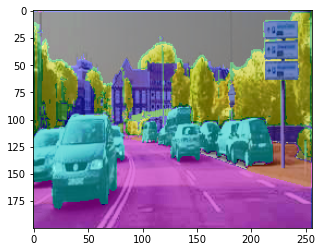

In [60]:
def ColorsToClass(seg):
    s = seg.reshape((seg.shape[0]*seg.shape[1],3))
    s = km.predict(s)
    s = s.reshape((seg.shape[0], seg.shape[1]))
    
    n = len(km.cluster_centers_)
    
    cls = np.zeros((seg.shape[0], seg.shape[1], n))
    
    for i in range(n):
        m = np.copy(s)
        m[m!=i] = 0
        m[m!=0] = 1
        
        cls[:,:,i]=m
        
    return cls

img, seg = LoadImage("495.jpg")
seg2 = ColorsToClass(seg)
seg2 = LayersToRGBImage(seg2)
total = cv2.addWeighted(img, 0.6, seg2, 0.4, 0)
plot.imshow(total[:,:,:])
plot.show()

As per the tests above I have observed the following: -

I tested the nuber of clusters from 6 to 14 to see which one is giving the best results 
    
If number of clusteres are greated than 13, the image doe not include all features/objects of the image.

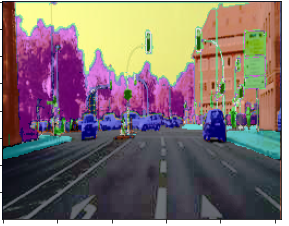

I tested with clusters 6, 7,8 still segmentation not compplete, at around 9, 10 it starts showing better results.

When number of clusters are equal to 13 I get the best results 
